In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

In [2]:
df = pd.read_csv('../data/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 27820 rows and 12 columns.


In [4]:
print('The column names are: ', df.columns.tolist())

The column names are:  ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [5]:
print('The data types of the columns are:\n', df.dtypes)

The data types of the columns are:
 country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [6]:
print(f'There are {df.duplicated().sum()} duplicate values in the dataset.')

There are 0 duplicate values in the dataset.


In [7]:
# Checking for missing values
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
print('The possible values in the age column are: ', df['age'].unique())
print('The possible values in the sex column are: ', df['sex'].unique())
print('The possible values in the generation column are: ', df['generation'].unique())

The possible values in the age column are:  ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
The possible values in the sex column are:  ['male' 'female']
The possible values in the generation column are:  ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


In [9]:
df = df.drop(columns='HDI for year')
# validation
print('Updated columns: ', df.columns.tolist())

Updated columns:  ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [10]:
df['gdp_for_year ($)'] = df[' gdp_for_year ($) '].str.replace(',', '')
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].astype(float)
# validation
print('The data types of the columns now:\n', df.dtypes)

The data types of the columns now:
 country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
gdp_for_year ($)      float64
dtype: object


In [11]:
# Ordering Age
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

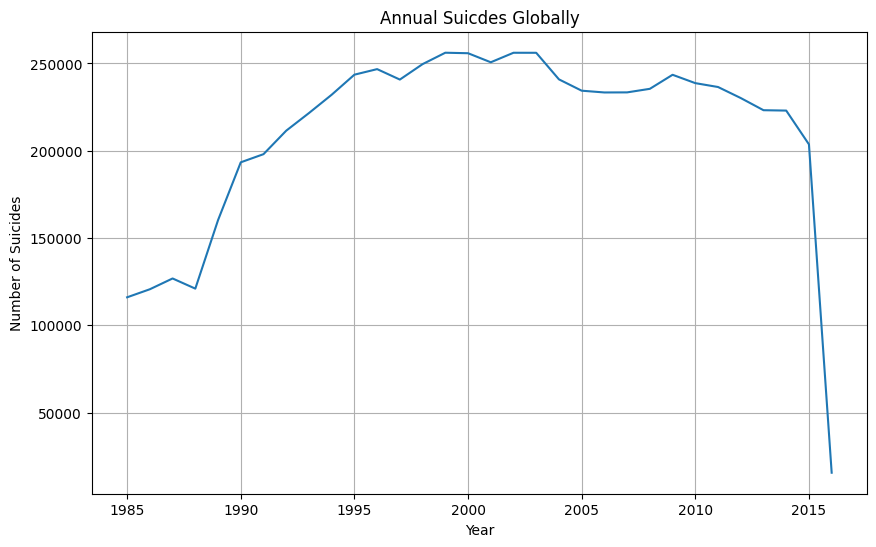

In [12]:
annual_suicides = df.groupby('year')['suicides_no'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='suicides_no', data=annual_suicides)
plt.title('Annual Suicdes Globally')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()

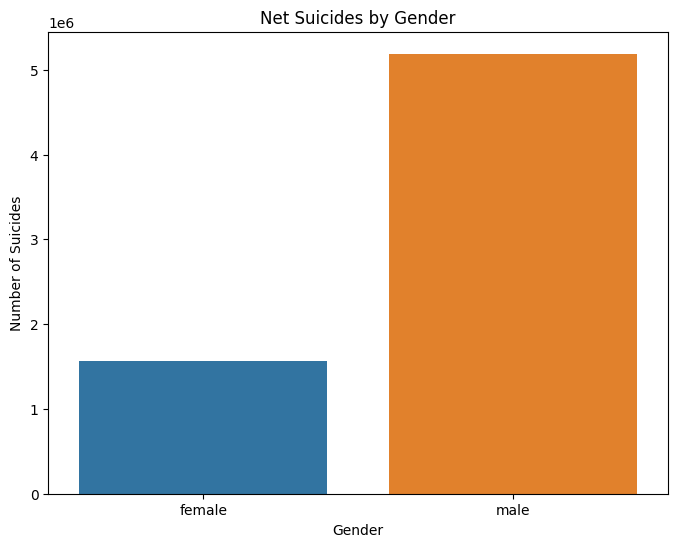

In [14]:
suicides_and_gender = df.groupby('sex')['suicides_no'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='suicides_no', data=suicides_and_gender)
plt.title('Net Suicides by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Suicides')
plt.show()

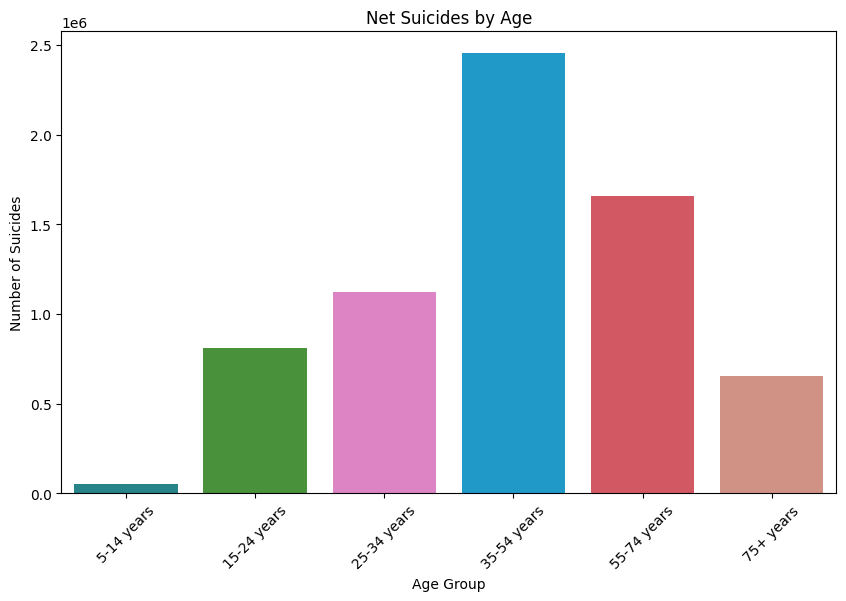

In [15]:
suicides_and_age = df.groupby('age')['suicides_no'].sum().reset_index()

age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
suicides_and_age['age'] = pd.Categorical(suicides_and_age['age'], categories=age_order, ordered=True)
age_suicides = suicides_and_age.sort_values('age')

plt.figure(figsize=(10,6))
sns.barplot(x='age', y='suicides_no', data=age_suicides, palette=['#179299', '#40a02b', '#ea76cb', '#04a5e5', '#e64553', '#dc8a78'])
plt.title('Net Suicides by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=45)
plt.show()

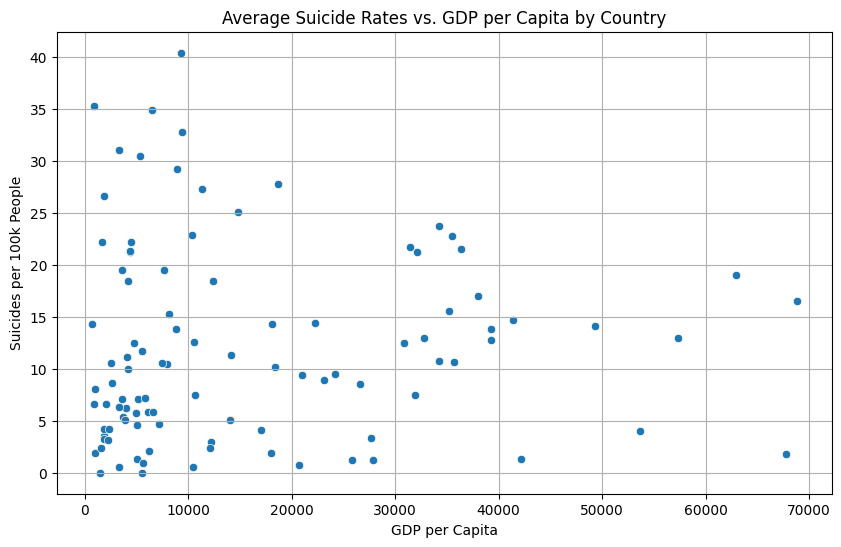

In [16]:
suicides_and_gdp = df.groupby('country')[['suicides/100k pop', 'gdp_per_capita ($)']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=suicides_and_gdp)
plt.title('Average Suicide Rates vs. GDP per Capita by Country')
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100k People')
plt.grid(True)
plt.show()

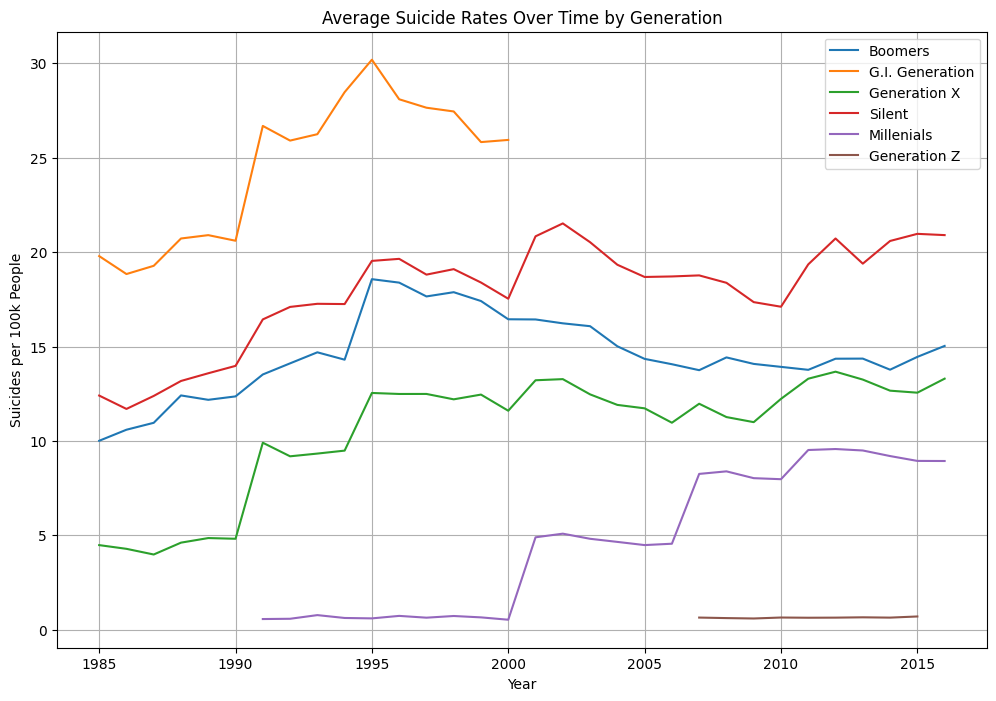

In [17]:
suicides_and_generations = df.groupby(['year', 'generation'])['suicides/100k pop'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(x='year', y='suicides/100k pop', hue='generation', data=suicides_and_generations)
plt.title('Average Suicide Rates Over Time by Generation')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k People')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

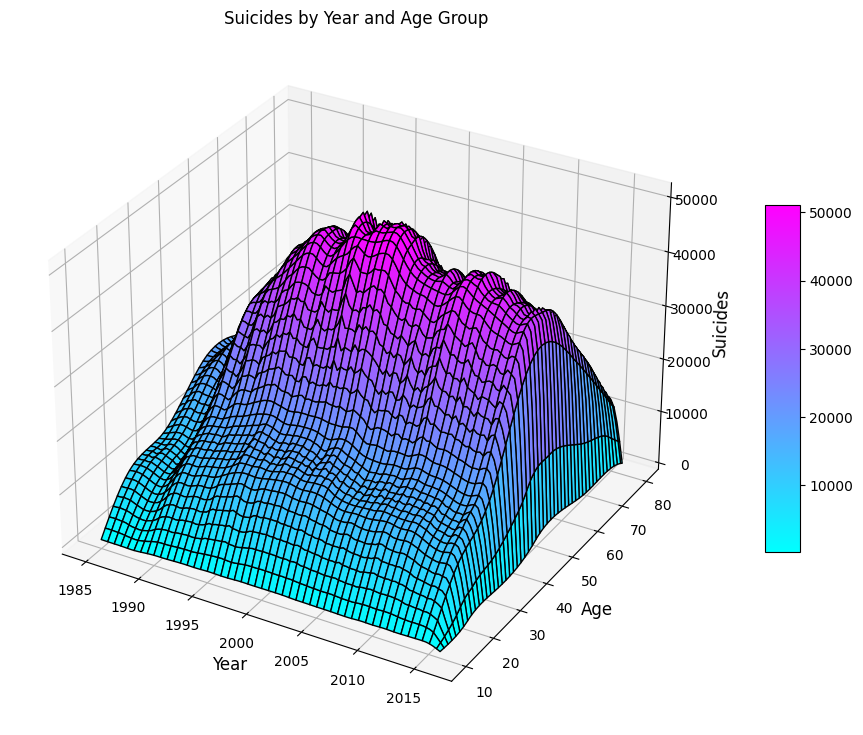

In [19]:
grouped_df = df.groupby(['year', 'age', 'sex'])['suicides_no'].sum().reset_index()

age_mapping = {'5-14 years': 10, '15-24 years': 20, '25-34 years': 30, '35-54 years': 45, '55-74 years': 65, '75+ years': 80}
grouped_df['age_num'] = grouped_df['age'].map(age_mapping)

mean_suicides = grouped_df.groupby(['year', 'age_num'])['suicides_no'].mean().reset_index()

years_grid, age_num_grid = np.mgrid[mean_suicides['year'].min():mean_suicides['year'].max():100j, 
                                    mean_suicides['age_num'].min():mean_suicides['age_num'].max():100j]

suicides_grid = griddata((mean_suicides['year'], mean_suicides['age_num']), mean_suicides['suicides_no'], 
                         (years_grid, age_num_grid), method='cubic')

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(years_grid, age_num_grid, suicides_grid, cmap='cool', edgecolor='k')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_zlabel('Suicides', fontsize=12)
ax.set_title('Suicides by Year and Age Group', fontsize=12)

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()